# _Python for Scientific Data Analysis_


#  Matplotlib

## Section 2: Subplots and Axes Configurations
In the previous section, we saw how to create basic scatter and line plots (_plt.scatter_, _plt.plot_), plot data with error bars (_plt.errorbar_), and discussed how to customize the manner in which data themselves are presented.   Now we will discuss how to customize the plots themselves.   This includes creating figures consisting of multiple plots in various ways and customizing axes for plots, configuring axes, and adding insets and annotations.

### Subplots

Now, the real power behind the ```fig,axes=plt.subplots()``` command is to create *_subplots_* (i.e. a figure with multiple panels).  

```plt.subplots(nrows,ncols,figsize=(xfigsize,yfigsize),sharex=None,sharey=None)```.   

The first and second entries give the number of rows and columns for the set of panels comprising a figure.   
Here's a simple example with 2 rows and 1 column (i.e. vertically stacked panels):

2


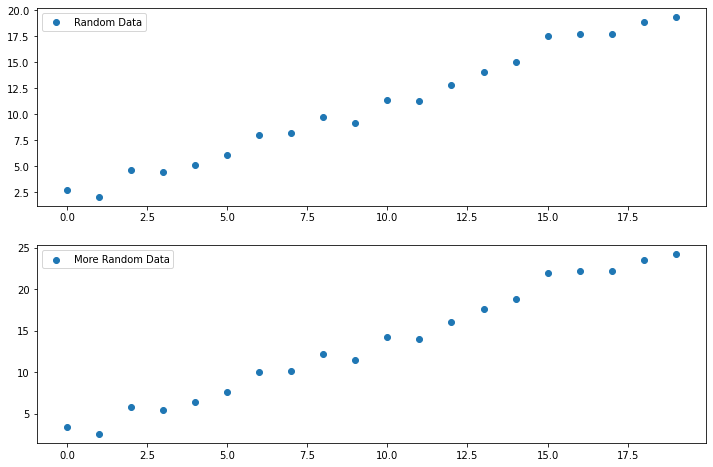

In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=[12,8]

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[0].legend(loc='best')
axes[1].legend(loc='best')

Notice how the call works with the ``axes`` container.    In defining ``fig,axes``, we have set there are going to be two plots.   In fact if we had asked Python about axes it would tell it is has two elements:

``len(axes)``, which returns ``2``.

Here is a more complex example with 2 rows and 1 column (i.e. vertically stacked panels), where the top panel is the same linear fit to randomized data but the bottom panel is a quadratic fit to randomized data and we have included more plot customization:

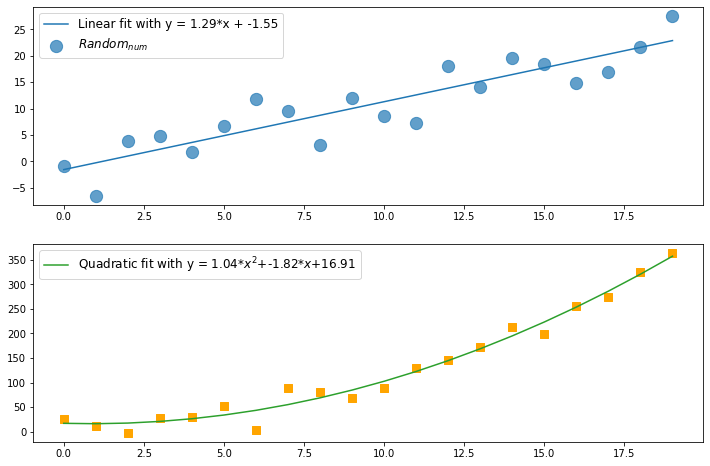

In [2]:
###(Ex_2.1)

 
xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one 

 #yarray2 again varied +/- about x but with different amount of 20*random_number
yarray2=(np.arange(20))**2.+20*np.random.randn(20)
 
 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

 #two rows, 1 column: i.e. the plots are vertically stacked
fig,axes=plt.subplots(2,1) 
 
 #first subplot
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='best',fontsize='large')

 #second subplot
axes[1].plot(xarray,poly(xarray),c='tab:green',
  label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50)
axes[1].legend(loc='best',fontsize='large')

# plt.show()

#![](./code/sect2/figures/Ex2_1.png)

Now, you'll notice I didn't put any labels, that is because the spacing between the x and y axis labels on both subplots is a bit wonky (i.e. the bottom plot will obscure the top plot's x-axis label).   

We can adjust the subplot properties to fix this in the following ways:

- _sharex[y]_  By default, each Axes is scaled individually.  But we can set whether or not to have the individual panels share axes (_sharex[y]_).  E.g. if you share the x axis then there is no reason to label the x-axis in both subplots.

- _subplots\_adjust_ will further tune the formatting and placement of figures.  Keywords include ``hspace``, which sets the height of the padding between subplots, and ``wspace``, which sets the width of the padding between subplots (both as a fraction of the average Axes height).   So if you define subplots as ``fig,axes = plt.subplots(2,1)``, setting ``fig.subplots_adjust(hspace=0)`` puts *no* vertical space between axes for the two vertically stacked plots.  

Other keywords (left, right, bottom, top) set the position of the edges of the subplots as a fraction of of the figure width.

The full API for these is here:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.subplots.html]()

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.subplots\_adjust.html]()

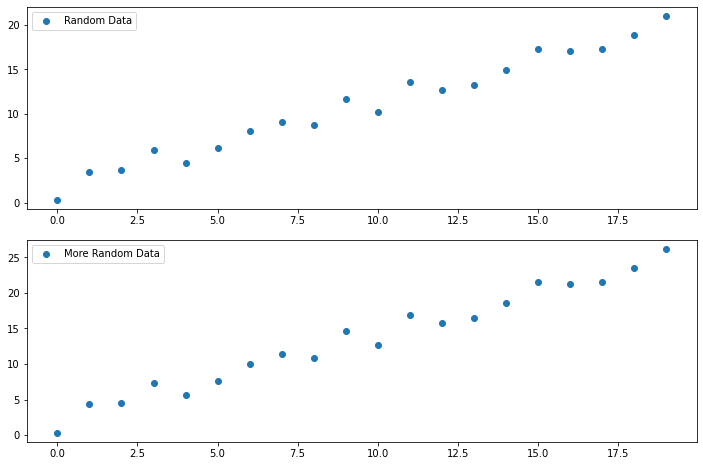

In [3]:
#Here is a simple example, adjusting the first plot

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)
fig.subplots_adjust(hspace=.15)

axes[0].scatter(xarray,yarray,label='Random Data')
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[0].legend(loc='best')
axes[1].legend(loc='best')

#### _More Examples_
Here are a couple of examples of adjusting subplots with two panels to make the panels appear nice, along with proper markup of the figures.

_**a)**_ vertically stacked panels with ``hspace=0.5`` to prevent overlapping labels.

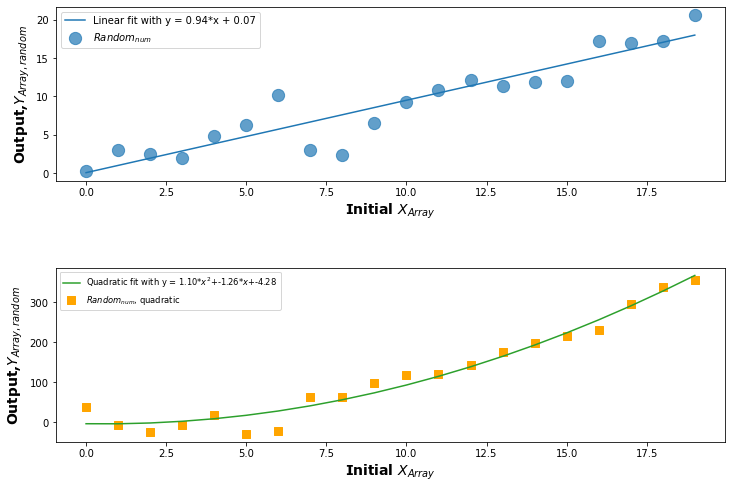

In [4]:
###(Ex_2.2a)


# import numpy as np 
# import matplotlib.pyplot as plt
#this will allow use NumPy's random number generator AND use the polynomial fit

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

fig,axes=plt.subplots(2,1)

fig.subplots_adjust(hspace=0.5)
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='best')

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='best',fontsize='small')

for i in range(len(axes)):

  axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

#plt.show()


#![](./code/sect2/figures/Ex2_2a.png)

_**b)**_ side-by-side panels.
 with ``wspace=0.325`` to prevent overlapping labels.  Note, I also altered _figsize_ to double the width:




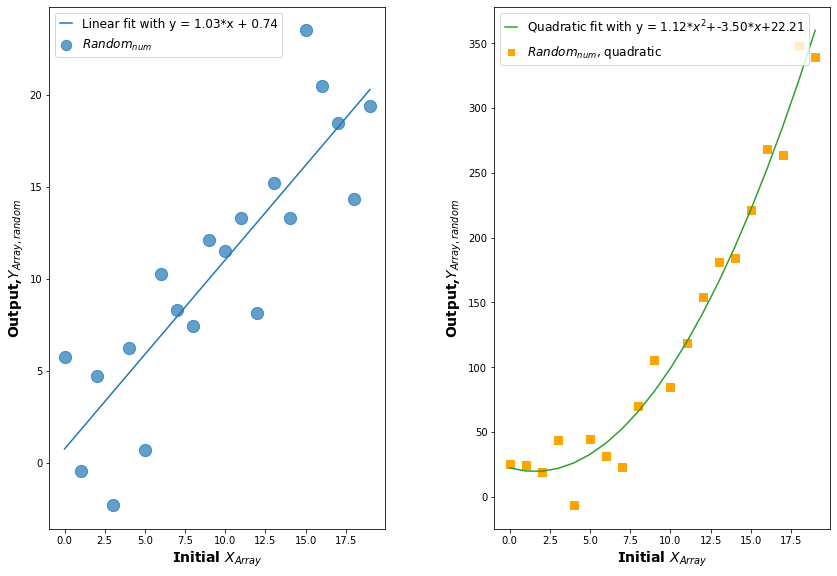

In [5]:
###(Ex_2.2b)
import matplotlib.pyplot as plt
import numpy as np

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

fig,axes=plt.subplots(1,2,figsize=(14,9.6))
#the default width is 6.4 inches by 4.8 inches, here increase width by 100%

fig.subplots_adjust(wspace=0.325)
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

for i in range(len(axes)):

  axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')
 
# plt.show()

#![](./code/sect2/figures/Ex2_2b.png)

_**c)**_ vertically-stacked panels sharing x-axes.  



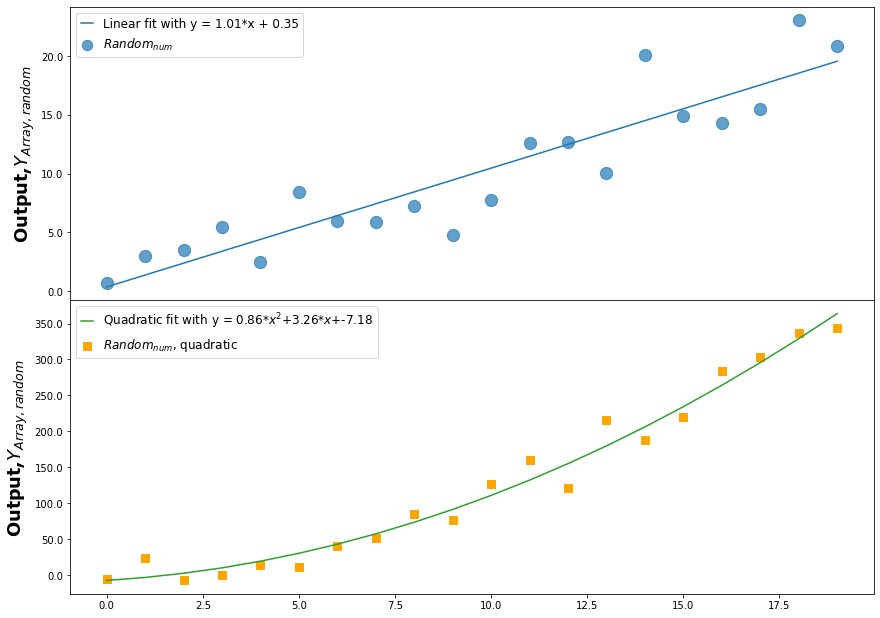

In [4]:
###(Ex_2.2c)
#import matplotlib.pyplot as plt

#import numpy as np

from matplotlib import ticker

xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit

standardsize=np.array((6.4,4.8))
scaleval=2.25
newsize=list(scaleval*standardsize)

fig,axes=plt.subplots(2,1,figsize=newsize)
#the default width is 6.4 inches by 4.8 inches, here increase width

#enforcing the same number of decimal points on the y-axis so the labels align
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

fig.subplots_adjust(hspace=0.) #no 'height space' between panels
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$')
axes[0].legend(loc='upper left',fontsize='large',handlelength=1,markerscale=0.85)

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='upper left',fontsize='large',handlelength=1)

for i in range(len(axes)):

  if i > 1:
   axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=18,color='black',weight='bold')
   #print the x axis label only along the bottom of the two panels
   
  axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=18,color='black',weight='bold')

 #plt.show()

#![](./code/sect2/figures/Ex2_2c.png)

#### _Examples With Three or More Subplots_

You can make an indefinite number of subplots.   Here is an example of four subplots with no spacings: the linear and quadratic random number trends generated and fitted twice.  Note the coding trickery to make the y-axis labels and axes ticks appear on the righthand side for the plots on the right.  

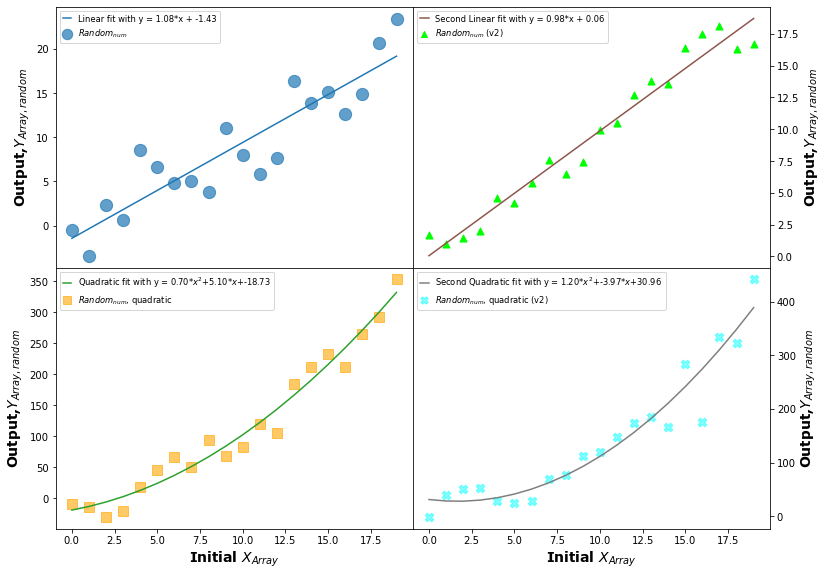

In [7]:
###(Ex2.2d)


#import matplotlib.pyplot as plt
#import numpy as np
 #from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]

#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

#now, iterate over the subplots on the righthand side only
for ax in [axes[0,1],axes[1,1]]:
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")

#set tick marks to the right for these ,set the labels to the right for these

# plt.show()

#![](./code/sect2/figures/Ex2_2d.png)

### Customizing Axes

By default, _**matplotlib**_ does not print minor tick marks and has the major tick marks facing outside the plot boundaries.  A lot of people don't like this (me included) and envy IDL's standard of always having inward-facing marks and minor tick marks (so, you know, you can _actually_ read graphs).  Thankfully, though we can _customize_ the axes to work around problems like these and others.  The key step is to create the _axes_ object: e.g. ``fig,axes = plt.subplots()``

#### _Tick Marks_

First, we can make Python plot minor ticks for linear plots: _axes.[x,y]axis.set_minor_locator(Autolocator([number]))_ .  The _number_ here determines the number of minor tick marks in between major ticks.   E.g. ``axes.xaxis.set_minor_locator(Autolocator(3))`` says "put three minor tick marks in between each major tick on the x axis".  

E.g. see below ...

2


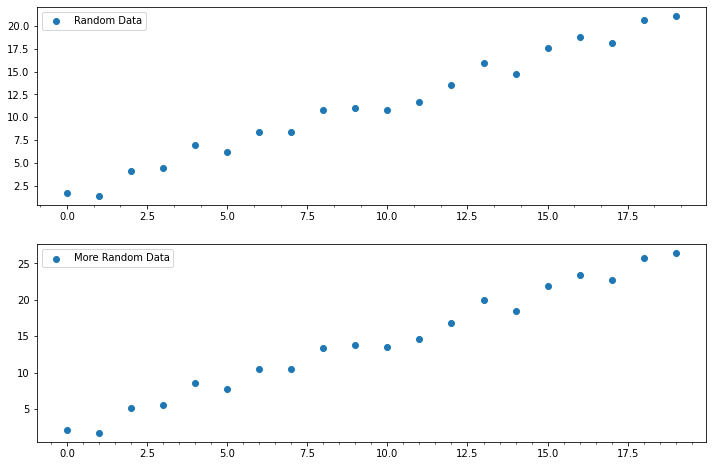

In [8]:
from matplotlib.ticker import AutoMinorLocator

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[0].legend(loc='best')
axes[1].legend(loc='best')

Now, for plots with a _logarithmic_ scale (see next section) on one of the axes, this is not going to work (Autolocator only works with linear plots).  So we have to do something else.  The cleanest way to do this -- and maintain control over how many minor ticks are produced -- is with _ticker.LogLocator_ .  See the API here: [https://matplotlib.org/stable/api/ticker\_api.html#matplotlib.ticker.LogLocator]().  Here, the key words are ``base`` (should be set to 10 for a log-10 scaling) and ``subs``.  ``subs`` is a bit tricky, but think of it as defining an array of minor tick spacings between major ticks.  E.g. ``np.arange(2,10)*0.1`` will put 8 minor ticks in between, say, 10 and 100 (etc); ``np.arange(2,5)*0.2`` would put 19 minor ticks between, say, 10 and 100 (etc).

2


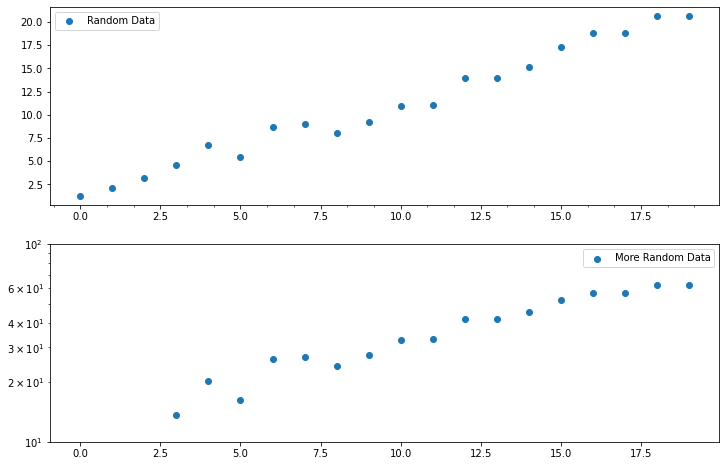

In [9]:
from matplotlib.ticker import LogLocator

xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*3

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].set_yscale('log')
axes[1].set_ylim(10,100)
axes[1].yaxis.set_minor_locator(LogLocator(base=10,subs=np.arange(2,10)*.1))


axes[0].legend(loc='best')
axes[1].legend(loc='best')

We can also change the tick marks formats in various ways using the _tick\_params_ attribute of the _axes_ .   The call is usually ``axes.tick_params( )``, where the parentheses enclose various keywords.  An overriding keyword is _which_ : this tells Python to which ticks (major, minor, or both) the following settings should apply.  Another is _axis_ : this tells Python which axis (x,y, or both) the following settings should apply.  

Beyond that, important keywords include:

- _direction_ : sets the direction of the tick marks (in, out, or inout).  E.g. ``axes_tick_params(which='both', axis='x',direction='in')`` says "make the major and minor ticks on the x axis point inwards".  Similarly, ``axes_tick_params(which='major', axis='both',direction='inout')`` says "make the major axis tick marks on both the x and y axes point in _and_ out".

- _length_ : sets the length of the tick marks.
- _width_ : sets the width of the tick marks.
- _labelsize_ : sets the size of the x and/or y axis labels. (e.g. this will make the numbers on the axes appear larger or smaller)
- _color_ : sets their color. 

The full API is here:
[https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html]()

Another thing we can do is add a _grid_ within the body of the figure: e.g. solid, dashed, dotted etc lines connecting major axes (e.g. ``axes.grid(True,linestyle='dashed',color='r')`` to make a red, dashed grid).  Some people think this clutters up figures: I think it can make them easier to interpret.

2


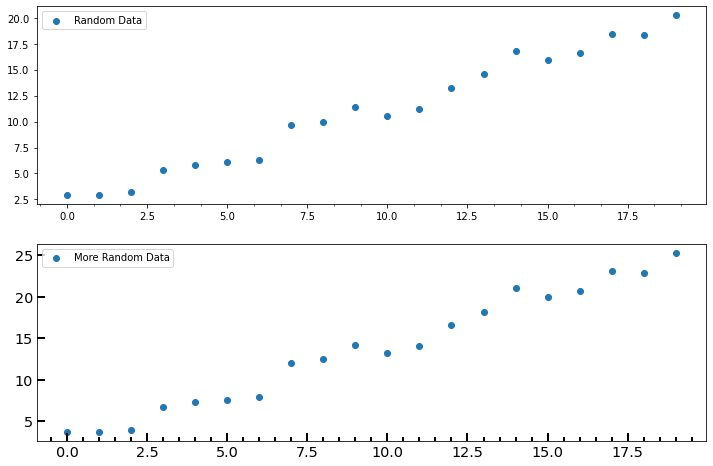

In [10]:
xarray=np.arange(0,20)
yarray=np.arange(20)+3*np.random.rand(20)
yarray2=yarray*1.25

#two rows, one column
fig,axes=plt.subplots(2,1)

print(len(axes))

axes[0].scatter(xarray,yarray,label='Random Data')
axes[0].xaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].scatter(xarray,yarray2,label='More Random Data')
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[1].tick_params(which='both',width=2,direction='in',labelsize='x-large')
axes[1].tick_params(which='major',length=8)
axes[1].tick_params(which='minor',length=4)
axes[0].legend(loc='best')
axes[1].legend(loc='best')


#ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
#  ax.tick_params(which='major',length=6)
#  ax.tick_params(which='minor',length=3)

Below is one detailed example, where we modify the previous 4-panel plot to plot minor ticks and make larger and thicker inward-pointing tick major/minor marks:

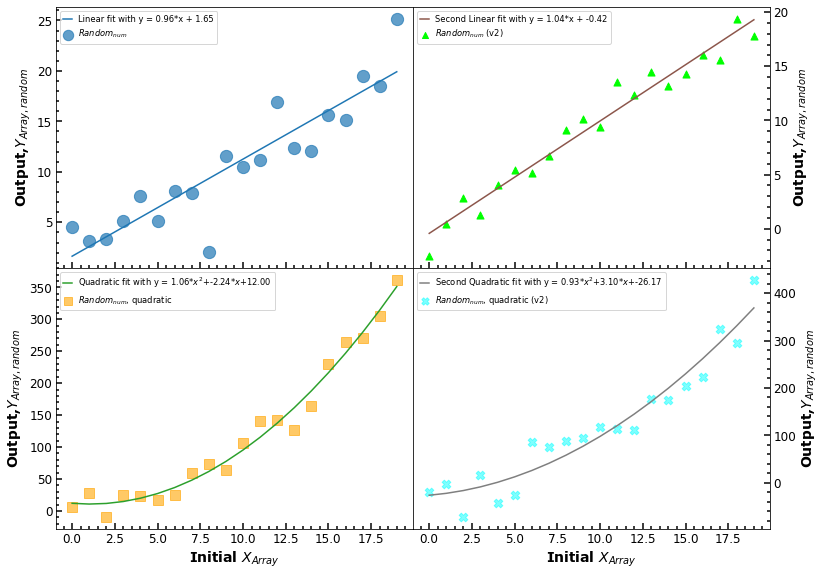

In [11]:
###(Ex_2.3a)

 #from matplotlib.ticker import FormatStrFormatter
#import matplotlib.pyplot as plt
# import numpy as np
 #from matplotlib import ticker
    
from matplotlib.ticker import AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 2x using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]
#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')


###Important New Stuff Here
  ax.xaxis.set_minor_locator(AutoMinorLocator(5))
  ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
  ax.tick_params(which='major',length=6)
  ax.tick_params(which='minor',length=3)

#now, iterate over the subplots on the righthand side only
for i,ax in enumerate([axes[0,1],axes[1,1]]):
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")



#![](./code/sect2/figures/Ex2_3a.png)

And here's a slightly more complex version, where for the lefthand panels we make the major axis tick marks magenta, make the numbers larger, and change the number orientation to be at 45 degrees.  For the top-right panel, we change the label size, while for the bottom-right panel we add a grid of dotted lines with "tab:blue" color. 

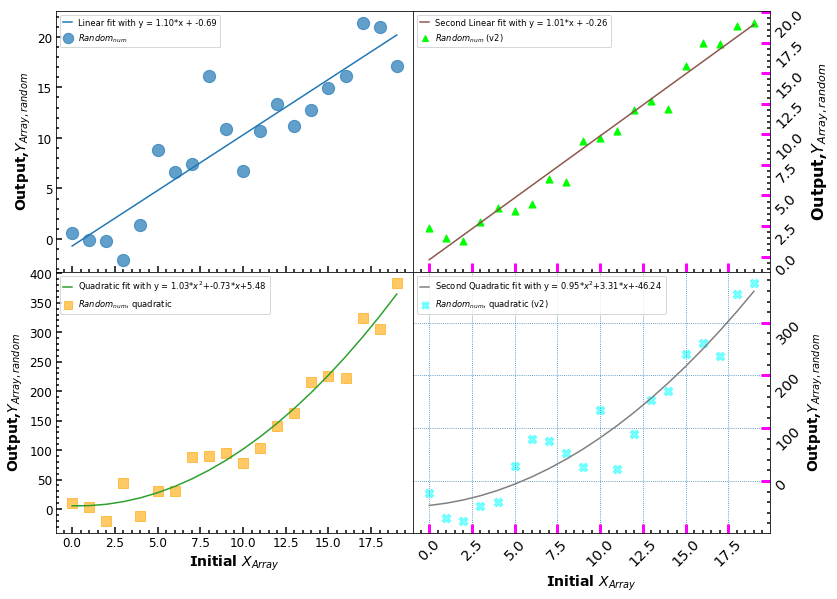

In [12]:
###(Ex_2.3b)


# import numpy as np
# import matplotlib.pyplot as plt
# #from matplotlib.ticker import FormatStrFormatter
# from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x
a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


#Panel 3 determination

yarray3=(np.arange(20))**2.+40*np.random.randn(20)

 #polynomial of degree two
a3,b3,c3=np.polyfit(xarray,yarray3,2)

poly2=np.poly1d(np.polyfit(xarray,yarray3,2))
 #a convenience class to write the polynomial fit


#Panel 4 determination
yarray4=np.arange(20)+1.5*np.random.randn(20)
 #y is same as x EXCEPT now we vary the value +/- some random number about x

a4,b4=np.polyfit(xarray,yarray4,1)
 #a polynomial fit of degree one look up the documentation if you are curious



standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(2,2,figsize=newsize,sharex=True)
#,sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),'Second Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a4,b4),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2), r'Second Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a3,b3,c3)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$ (v2)',r'$Random_{num}$, quadratic',r'$Random_{num}$, quadratic (v2)']

colors_fit=['tab:blue','tab:brown','tab:green','tab:gray']

colors_data=['tab:blue','lime','orange','cyan']

sizes_data=[150,50,100,75]
marker_data=['o','^','s','X']
alphas_data=[0.7,1,0.6,0.5]

#turn the functional fits into a list

eq=[xarray*a+b,xarray*a4+b4,poly(xarray),poly2(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray4,yarray2,yarray3]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

  ax.xaxis.set_minor_locator(AutoMinorLocator(5))
  ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  ax.tick_params(which='both',width=1.5,direction='in',labelsize='large')
  ax.tick_params(which='major',length=6)
  ax.tick_params(which='minor',length=3)

#now, iterate over the subplots on the righthand side only
for i,ax in enumerate([axes[0,1],axes[1,1]]):
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position("right")
  if i == 0:
   ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',color='black',weight='bold',size=16)
  else:
   ax.grid(True,linestyle='dotted',color='tab:blue')
  ax.tick_params(which='major',color='magenta',labelsize='x-large',labelrotation=45,width=3,length=9)


#![](./code/sect2/figures/Ex2_3b.png)

### _Axis Limits, Scaling, and Formatting_

While _**matplotlib**_ automatically sets axis limits by default, we can also 1) manually adjust them, 2) adjust whether the data are displayed on a linear scale, log scale or semilog scale, 2) adjust the formatting of numbers displayed along each axis, and 4) adjust the spine thicknesses and appearances.

- 1) _**limits**_ -- We discussed this in the previous section but it bears worth repeating.  With _plt_, the limits are set by ``plt.[x,y]lim([min number],[max number])``  E.g. ``plt.xlim(1,100)`` sets the x-axis limits on the plot to be between 1 and 100. 

**important**- With the _axes_ container it is ``axes.set_[x,y]lim([min number],[max number])``.  E.g. to set the x axis limits to be between 1 and 100 you do ``axes.set_xlim(1,100)``.

- 2) _**scaling**_ -- with _plt_, the scaling is set by ``plt.[x,y]scale([scale type])``, where scale type can be 'linear', 'log','symlog' (symmetric about 0), 'logit', etc.  See here: [https://matplotlib.org/stable/gallery/scales/]().  

 With the _axes_ container it is ``axes._set[x,y]scale([scale type])``.  E.g. see here [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.axes.Axes.set_ylim.html]()

-  3) _**formatting numbers on axes**_ -- this is handled using the _axis_ container and calling ``from matplotlib import ticker`` to import the _ticker_ function.   Then you _set\_major\_formatter_ .

 E.g. ``axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))`` will make the numbers along the y-axis be a floating point with 3 places after the decimal (note: we already did this in Figure 2.2c). See here: [https://matplotlib.org/stable/api/ticker\_api.html]()

- 4) _**formatting the axis spines**_ -- This is surprisingly tricky to do efficiently compared to IDL.  There are two ways I know of to cleanly do this. First, use the _axes.spines_ property.  There are typically four spines: 'top','bottom','left','right'.  Now, for one you can do all this manually: e.g. ``axes.spines['top'].[do stuff]``.    Here 'do stuff' can include a bunch of things.  For one you can change the axis thicknesses from the default value of 1.5: e.g. ``axes.spines['top'].set_linewidth(3)``

 You can also do a for-loop over these spines in fewer lines of code: e.g. 

```
 for axnum in ['top','bottom','left','right']: 
        axes.spines[axn].set_linewidth(4)
```
 
Another efficient way of coding this is to use _plt_ instead to "set properties" (_setp_): e.g. ``plt.setp(ax.spines.values(),[do stuff])``.  What stuff can you do? Well, one way to figure that is to type ``plt.getp(axes.spines.values())``, which will tell you all of the properties of _axes.spines_ (and thus all of the ways you can modify these properties).   For changing the linewidth to 3, we would do the following: ``plt.setp(ax.spines.values(),linewidth=3``.

#### _A Worked Example_

In the following example, we 1) set the y axis limits for each plot ( (-7,27) and (0.5,500) for the left and right panels, respectively), 2) set the righthand y axis scaling to logarithmic, 3) make the y axis numbers display as floating point with 1 digit after the decimal, and 4) thicken the axes spines to a value of 2.  We also increased the size of the numbers somewhat.

See here:
    

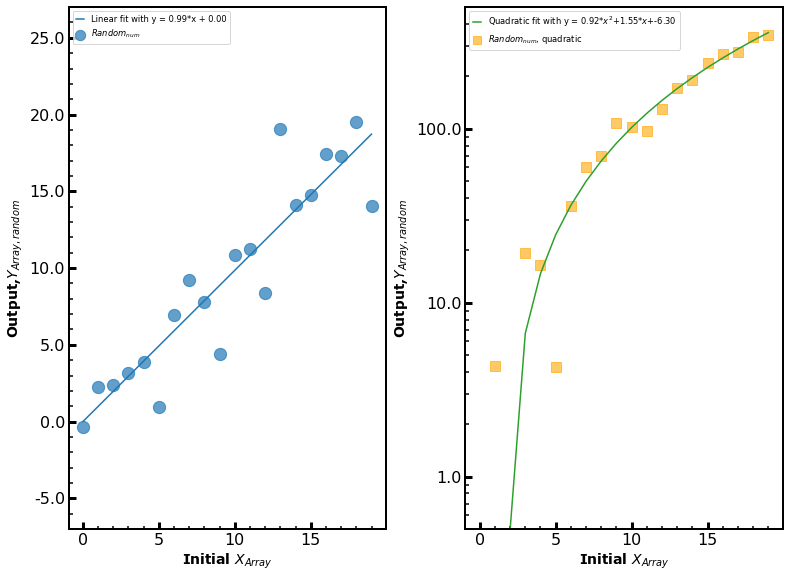

In [7]:
###(Ex_2.4)

#import matplotlib.pyplot as plt
#import numpy as np
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

xarray=np.arange(20)   #an array of numbers from 0 to 19

# in this example, we are just going to do one linear plot and one quadratic plot
#Panel 1 determination
yarray=np.arange(20)+3*np.random.randn(20)

 #y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
 #a polynomial fit of degree one look up the documentation if you are curious

#Panel 2 determination
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

#this is equivalent to yarray2[where(yarray2 le 0)] > 0.01 in IDL
  #it basically sets to 0.01 any value from the random number generator that is less than 0
(yarray2 > 0.0).choose(yarray2,0.01)

 #polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
 #a convenience class to write the polynomial fit


standardsize=np.array((6.4,4.8))
scaleval=2
newsize=list(scaleval*standardsize)

#the default width is 6.4 inches by 4.8 inches, here increase width by 100% using variables
fig,axes=plt.subplots(1,2,figsize=newsize)
fig.subplots_adjust(hspace=0.25,wspace=0.25)

# turn the fit labels, fit data points, fit colors, data point colors, data point sizes, ...
## data markers (symbols), data alphas ... all to lists

labels_fits = ['Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b),
             r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2)]

labels_data=[r'$Random_{num}$',r'$Random_{num}$, quadratic']

colors_fit=['tab:blue','tab:green','tab:gray']

colors_data=['tab:blue','orange']

sizes_data=[150,100]
marker_data=['o','s']
alphas_data=[0.7,0.6]

#turn the functional fits into a list

eq=[xarray*a+b,poly(xarray)]

#turn the generated data arrays into a list
dataarr=[yarray,yarray2]

#use python enumerate over axes; flatten axes ... columns first, then rows
# ax represents each iteration of axes (i.e. axes.flat([0]), axes.flat([1]), etc etc
# you advance i as well
for i,ax in enumerate(axes.flat):
  ax.plot(xarray,eq[i],label=labels_fits[i],c=colors_fit[i])
  ax.scatter(xarray,dataarr[i],marker=marker_data[i],c=colors_data[i],s=sizes_data[i],alpha=alphas_data[i],label=labels_data[i])
  ax.legend(loc='upper left',fontsize='small',handlelength=1,markerscale=0.85)
  ax.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
  ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

  ax.tick_params(which='both',direction='in',labelsize=16)
  #note: I changed the label size to make the numbers larger
  
  ax.tick_params(which='major',length=7,width=3)
  ax.tick_params(which='minor',length=3.5,width=1.5)
  ax.xaxis.set_minor_locator(AutoMinorLocator(5))


  if i == 0:
   ax.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',color='black',weight='bold',size=14)
   ax.set_ylim(-7,27)
   ax.set_yscale('linear')
   ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  else:
   ax.set_ylim(0.5,500)
   ax.set_yscale('log')
   ax.yaxis.set_minor_locator(ticker.LogLocator(base=10,subs=np.arange(1,10)*.1))

  ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
  #floating point with one digit after the decimal

# one way to thicken spines of the plot
  for axl in ['top','bottom','left','right']:
   ax.spines[axl].set_linewidth(2)
#other way
  #plt.setp(ax.spines.values(),linewidth=2)

# plt.show()


#![](./code/sect2/figures/Ex2_4.png)

### Twin Axes and Secondary Axes on a Plot
#### _Twin Axes_

In all the examples previously, we have plotted data and a fit to the data with a single x and y axis on a given panel.  What if we want to plot different data/fits that has different units on the same panel?   Then we have to add a _**twin**_ axis.  Okay, but what if we want to plot the _same_ data but with different units?  Well, then we need a _**secondary**_ axis.  

The key command for a twin axis is -- you guessed it -- employs the _**axes**_ container and uses a property called _twin[x,y]_: e.g. ``twin_axisx = axes.twinx()`` for a twin x axis on a given plot (i.e. you share the same x axis but are plotting different things along y).   ``twin_axisy = axes.twiny()`` is the command for a twin y axis.  

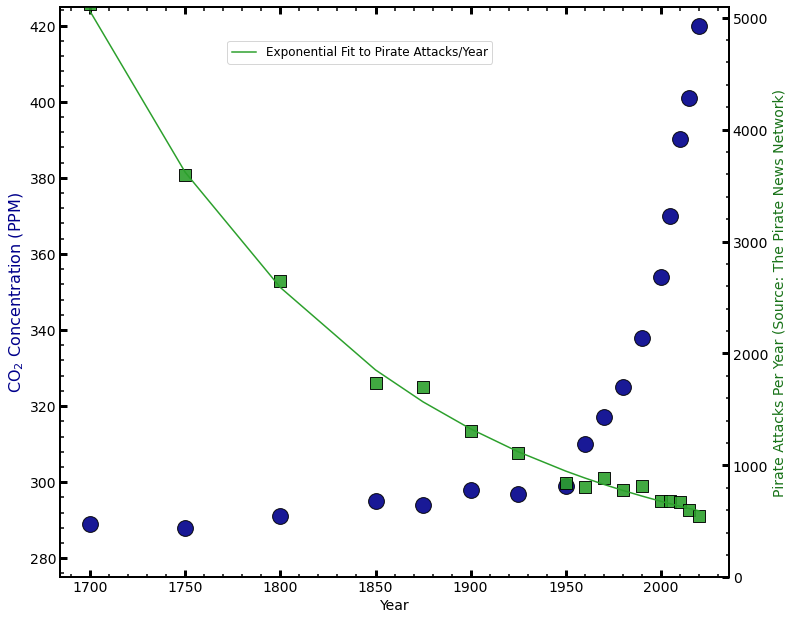

In [14]:
###(Ex_2.5)

#from matplotlib.ticker import MultipleLocator,AutoMinorLocator

CO2concentration=np.array([289,288,291,295,294,298,297,299,310,317,325,338,354,370,390.1,401,420]) #roughly estimated from NOAA
CO2years=np.array([1700,1750,1800,1850,1875,1900,1925,1950,1960,1970,1980,1990,2000,2005,2010,2015,2020])

sval=0.25 #add some noise to the number of pirate attacks/year
pirate_attacks=5000*np.exp(-1*(CO2years-CO2years[0])/150)*(1+sval*0.25*np.random.randn(len(CO2years)))

fig,axes=plt.subplots(figsize=(8*1.5,7*1.5))

 #now fit an exponential to the pirate attacks

piratefit=np.polyfit(CO2years,np.log(pirate_attacks),1)

atest=np.exp(piratefit[1])
btest=piratefit[0]

axes.scatter(CO2years,CO2concentration,marker='o',s=250,color='darkblue',edgecolor='black',alpha=0.9,label='CO2')
axes.set_xlabel('Year',fontsize=14)
axes.set_ylabel(r'CO$_{\rm 2}$ Concentration (PPM)',fontsize=16,color='darkblue')

axes.set_ylim(275,425)

axes.tick_params(which='both',width=1.5,direction='in',labelsize=14)
axes.tick_params(which='major',length=7,width=3)
axes.tick_params(which='minor',length=3.5,width=1.5)

#this makes the labels appear at top and bottom
axes.tick_params(labeltop=False,labelbottom=True,bottom=True,top=True,labelright=True)

axes.xaxis.set_ticks_position('both')
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_ticks_position('both')
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

####THIS IS THE KEY LINE

axes2=axes.twinx()

axes2.tick_params(which='both',direction='in',labelsize=14)
axes2.set_ylim(0,5100)

axes2.scatter(CO2years,pirate_attacks,marker='s',s=150,color='tab:green',edgecolor='black',alpha=0.9)

axes2.plot(CO2years,atest*np.exp(btest*CO2years),ls='-',label='Exponential Fit to Pirate Attacks/Year',color='tab:green',)
axes2.set_ylabel(r'Pirate Attacks Per Year (Source: The Pirate News Network)',fontsize=14,color='darkgreen',alpha=0.9)

axes2.legend(loc=[0.25,0.9],fontsize='large',markerscale=0.85)


axes2.tick_params(which='both',width=1.5,direction='in',labelsize=14)

axes2.tick_params(which='major',length=7,width=3)
axes2.tick_params(which='minor',length=3.5,width=1.5)
axes2.xaxis.set_ticks_position('both')
axes2.xaxis.set_minor_locator(AutoMinorLocator(5))

axes2.yaxis.set_ticks_position('right')
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))

axes2.tick_params(labeltop=True)

#fig.tight_layout() #note: see what this does

# plt.show()

#![](./code/sect2/figures/Ex2_5.png)

#### _Secondary Axes_

The key command for a secondary axis also employs the _**axes**_ container and uses a property called _secondary\_[x,y]axis_.   

The full API is here: [https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary\_axis.html]().  For now, though, there are a few key items that you will widely need to set.  First, you need to tell where this axis will be drawn ('top','bottom','left','right').   Second, it's not enough to declare a secondary axis: you need to tell it how the numbers _map_ to the primary axis.  This is done through a _function_ keyword and an associated inverse function.  

There are different ways of defining a _function_ for use with secondary axes here.  Two options include 1) calling a separation function (i.e. a separate _def_ program) and its inverse or 2) using a _lambda_ function and its inverse (easiest if you can do this in one line).  For example, if you have two axes -- one of which is wavelength (main) and another is frequency (secondary), then you can define a _def_ that contains the following lines:

    

```
def wvlh2freq(wvlh):
 #if wvlh is in microns
 c=2.9979e14 #microns/s
 return c/wvlh

#the inverse function
def freq2wvlh(freq):
 #if frequency is in Hz
 c=2.9979e14 #microns/s
 # return wvlh in microns
 return c/freq
``` 

An equivalent lambda function would be ``lambda x: 2.9979e14/x`` (and in this case, its inverse would be the same).

The following is an example where we plot contrast vs separation for several planet imaging (extreme AO) instruments, reading in an input text file for SCExAO/CHARIS, estimating improved performance later through some function trickery, and comparing to a conventional AO imaging system.  Here, the secondary axis is projected physical separation, which we figure out given an assumed distance to our hypothetical star of 40 pc.

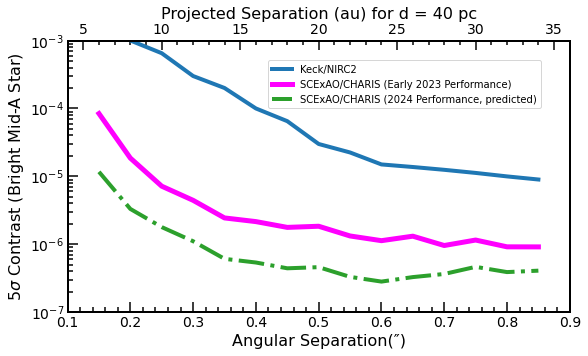

In [15]:
###(Ex_2.6)

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator
from scipy import interpolate

 #array of angular separations

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(9,5))

axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(1e-7,1e-3)
axes.set_xlim(0.1,0.9)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=True,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here

#note: setting this to 'both' would make contrast numbers appear on left and right side of plot
axes.yaxis.set_ticks_position('left')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)

###IMPORTANT LINES
secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
secondaxis.tick_params(which='both',direction='in',labelsize=14)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)
axes.legend(loc=[0.4,0.75])

# plt.show()

#![](./code/sect2/figures/Ex2_6.png)

### _Insets_

You can also produce inset plots (plots within plots): the required commands within _matplotlib_ slightly differ depending on what you are trying to do.

Case 1: to just generate a plot-within-a-plot, you still need the ``plt.subplots()`` call initially to define the _fig_ and _axes_ containers.  To add a second plot _within_ a plot, you can call ``inset_figure=fig.add_axes([location and dimensions])``.   Here the numbers in brackets should refer to the starting x, starting y, width, and height of this inset plot.  E.g. ``left,bottom,width,height=[0.5,0.5,0.33,0.25]``.   Note that the units here are in relative dimensions of the entire plot (e.g. as seen in ``plt.show()``).   

Case 2: there are cases where you want the inset to be a _zoom-in_ of the primary plot: not plotting a separate thing.   In this case, the _matplotlib_ calls are different.  We have to import another function: ``from mpl_toolkits.axes_grid.inset_locator import inset_axes``.   The call then is ``inset_figure=axes.inset_axes([x,y,width,height])`` and finally ``axes.indicate_inset_zoom(secondaxis)`` to show this second plot as a zoom-in of the major plot.

Below are two examples from the previous plot: Case 1) we create an inset plot and redo the x and y axes to plot projected separation in au and contrast in magnitudes, respectively and Case 2) we create an inset plot that is a zoom-in. 

    

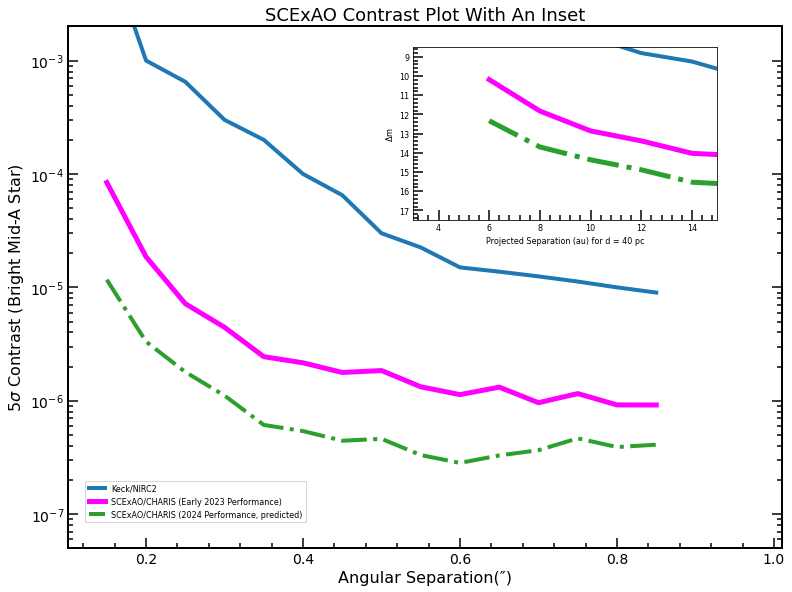

In [16]:
### Case 1(Ex_2.7)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
 #a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


 #approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
 #print(fkeck)
 #exit()
contrast_5sig_keck=fkeck(ang_sep_new)
 #estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

fig,axes=plt.subplots(figsize=(12.8,9.6))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note: setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
   #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14)
axes.tick_params(which='major',length=10,width=1.5)
axes.tick_params(which='minor',length=5,width=1.5)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 #log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=16)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=16)
axes.set_title('SCExAO Contrast Plot With An Inset',fontsize=18)

###IMPORTANT LINES

left,bottom,width,height=[0.5,0.6,0.33,0.25]
secondaxis=fig.add_axes([left,bottom,width,height])
 

secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_keck),linewidth=4,markersize=np.sqrt(50),color='tab:blue')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours),linewidth=5,color='magenta')
secondaxis.plot(dstar*ang_sep_new,-2.5*np.log10(contrast_5sig_twohours_new),ls='-.',linewidth=5,color='tab:green')
secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=8)
secondaxis.set_ylabel('$\Delta$m',fontsize=8)
secondaxis.set_xlim(3,15)
secondaxis.set_ylim(17.5,8.5)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))

 #thicken the spines
for axl in ['top','bottom','left','right']:
   axes.spines[axl].set_linewidth(2)

 #new legend location to avoid clashes
axes.legend(loc=[0.025,0.05],fontsize=8)

# plt.show()

#![](./code/sect2/figures/Ex2_7.png)

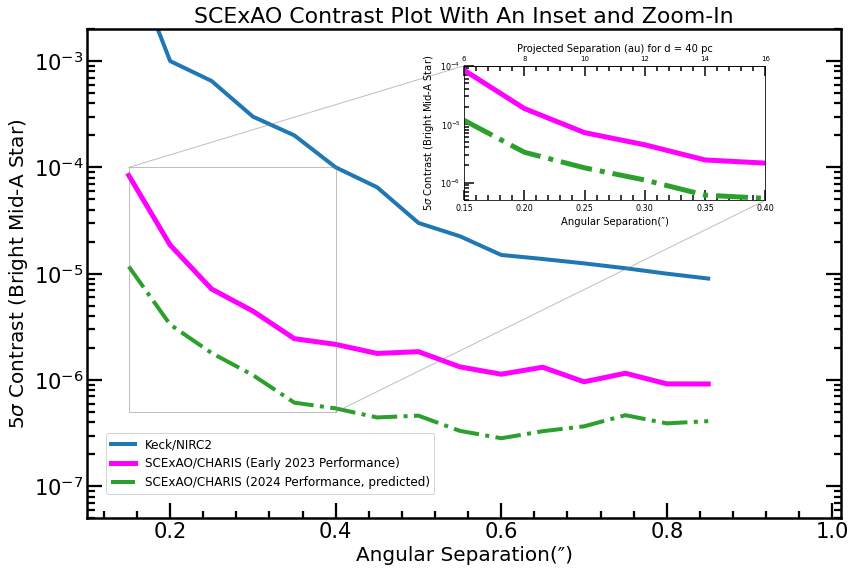

In [17]:
### Case 2(Ex_2.8)


# import matplotlib.pyplot as plot
# import numpy as np
# from scipy import interpolate
# from matplotlib.ticker import MultipleLocator,AutoMinorLocator,LogLocator



#import matplotlib.pyplot as plt
#import numpy as np

#from scipy import interpolate
#from mpl_toolkits.axes_grid.inset_locator import inset_axes
#from matplotlib.ticker import AutoMinorLocator

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With An Inset and Zoom-In',fontsize=22)

###IMPORTANTLINES

#secondaxis=inset_axes(axes,width=1.3,height=0.9,[0.5,0.6])
#secondaxis=axes.inset_axes([0.625, 0.65, 0.33, 0.25])
secondaxis=axes.inset_axes([0.5, 0.65, 0.4, 0.275]) #looks better in jupyter notebooks
#,width=1.3,height=0.9)
#left,bottom,width,height=[0.5,0.6,0.33,0.25]
#secondaxis=fig.add_axes([left,bottom,width,height])
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

secondaxis.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta')
secondaxis.plot(ang_sep_new,contrast_5sig_twohours_new,ls='-.',linewidth=5,color='tab:green')
secondaxis.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=10)
secondaxis.set_xlabel('Angular Separation(\u2033)',fontsize=10)
secondaxis.set_xlim(0.15,0.4)
secondaxis.set_ylim(5e-7,1e-4)
#secondaxis.set_ylim(5e-8,2e-3)
secondaxis.tick_params(which='both',direction='in',labelsize=8)
secondaxis.tick_params(which='major',length=10,width=1.5)
secondaxis.tick_params(which='minor',length=5,width=1.5)
secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))
#secondaxis.yaxis.set_minor_locator(AutoMinorLocator(5))
secondaxis.set_yscale('log')

secondary_axis2=secondaxis.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))
secondary_axis2.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=10)
secondary_axis2.tick_params(which='both',direction='in',labelsize=7)
secondary_axis2.tick_params(which='major',length=10,width=1.5)
secondary_axis2.tick_params(which='minor',length=5,width=1.5)
secondary_axis2.xaxis.set_minor_locator(AutoMinorLocator(5))

axes.indicate_inset_zoom(secondaxis)

for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2.5)

axes.legend(loc=[0.025,0.05],fontsize=12)

### Annotations

You can annotate a plot with text and arrows.  For simple text markup, the most straightforward way is to use ``axes.text(x,y,text,ha=ha,va=va,transform=transform``, which has accepts x and y positions, your text, vertical and horizontal alignment (ha, va), and a mapping between the coordinates and the plot (transform).  Note "transform" can correspond to axis coordinates or data coordinates depend on what you set.  The API for _text_ is here [https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.text.html]().

Arrows are common markers.  The most straightforward way to draw an arrow is with ``axes.arrow(x,y,dx,dy,width=width,length=length,transform=transform,color=color,fill=[True/False])``, where the full API is given here:
[https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.arrow.html]().   Note there are fancy ways of overplotting a _circle_  but to me the simplest way is to call ``axes.scatter`` and setting the color to 'none' and symbol size _s_ to a large number.

For something more involved, ``axes.annotate`` is what you want.  The API for _annotate_ is here: [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.annotate.html]() . It can accept text and properties for arrows connecting the text to the end points, usually with a dictionary of values for the arrow properties.   One of the key ones is the _connectionstyle_ property, which will allow you to draw different kinds of connecting lines with an arrowhead at the end.  The API for connection styles is here: [https://matplotlib.org/stable/gallery/userdemo/connectionstyle\_demo.html]()

Here is one modification to our previous plot that illustrates several different kinds of annotations: simple text, _annotate_ with just a straight line (done three times), _arrow_, and _annotate_ done once with a complex connection style.

                                                                                                                          

Text(0.3, 7e-06, '51 Eri b')

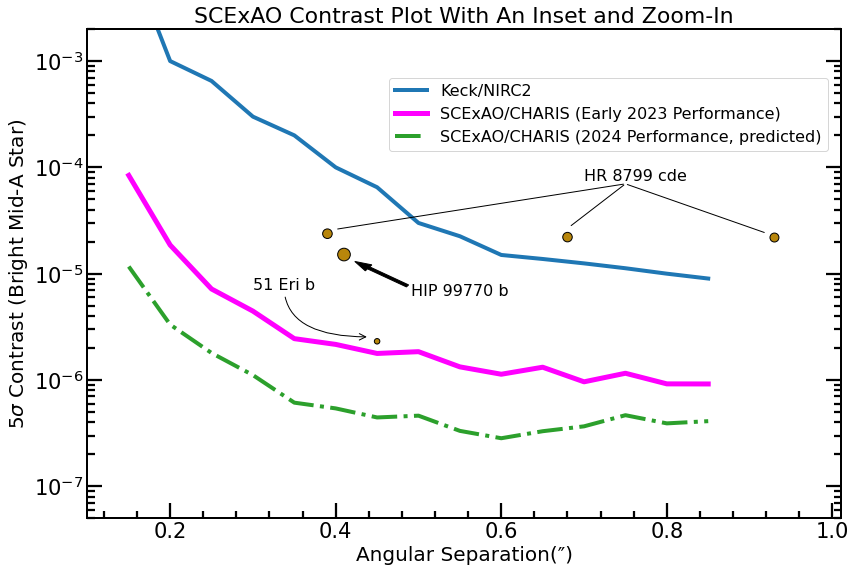

In [11]:
#Ex 2.9

from scipy import interpolate

file_in='./code/sect2/files/broadband_contrast.txt'

dstar=40 #assume a distance of 40 pc
dtypes={'names':('angsep','contrast'), 'formats':(np.float64,np.float64)}

a = np.loadtxt(file_in,usecols=range(2),dtype=dtypes)
#a=np.loadtxt(file_in)

ang_sep=a['angsep']
contrast_5sig=a['contrast']

nhour=2
scalefact=(nhour*3600/1800.)**(0.5)

fscexao=interpolate.interp1d(ang_sep,contrast_5sig/scalefact)

ang_sep_new=np.arange(0.15,0.9,0.05)
contrast_5sig_twohours=fscexao(ang_sep_new)


#approximate performance for Keck/NIRC2

ang_sep_keck=np.array([0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
contrast_keck=np.array([1e-2,1e-3,3e-4,1e-4,3e-5,1.5e-5,1.25e-5,1e-5,8e-6])

fkeck=interpolate.interp1d(ang_sep_keck,contrast_keck)
#print(fkeck)
#exit()
contrast_5sig_keck=fkeck(ang_sep_new)
#estimate for new performance, SCExAO

improve_fact=4
contrast_5sig_twohours_new=contrast_5sig_twohours/improve_fact
igood=np.where(ang_sep_new < 0.25)
contrast_5sig_twohours_new[igood]/=(3-ang_sep_new[igood]*8.)
ibad=np.where(ang_sep_new > 0.7)
contrast_5sig_twohours_new[ibad]*=(1+1.75*ang_sep_new[ibad]-.7)

#print(ang_sep)

scale=1.5
fig,axes=plt.subplots(figsize=(9*scale,6*scale))
#fig,axes=plt.subplots(figsize=(12.8,9))
axes.plot(ang_sep_new,contrast_5sig_keck,linewidth=4,markersize=np.sqrt(50),color='tab:blue',label='Keck/NIRC2')
axes.plot(ang_sep_new,contrast_5sig_twohours,linewidth=5,color='magenta',label='SCExAO/CHARIS (Early 2023 Performance)')
axes.plot(ang_sep_new,contrast_5sig_twohours_new,linewidth=4,ls='-.',color='tab:green',label='SCExAO/CHARIS (2024 Performance, predicted)')

axes.set_yscale('log')
axes.set_ylim(5e-8,2e-3)
axes.set_xlim(0.1,1.01)

#note:setting to 'both' instead of 'bottom' would draw tick marks at top of plot:
  #would mismatch with secondary axis tick marks
axes.xaxis.set_ticks_position('bottom')

axes.tick_params(labeltop=False,labelbottom=True,labelright=False,labelleft=True)
axes.tick_params(which='both',direction='in',labelsize=14*scale)
axes.tick_params(which='major',length=10*scale,width=1.5*scale)
axes.tick_params(which='minor',length=5*scale,width=1.5*scale)
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
#log scale automatically sets minor tick marks to be reasonable here
axes.yaxis.set_ticks_position('both')

axes.set_ylabel(r'5$\sigma$ Contrast (Bright Mid-A Star)',fontsize=20)
axes.set_xlabel('Angular Separation(\u2033)',fontsize=20)
axes.set_title('SCExAO Contrast Plot With An Inset and Zoom-In',fontsize=22)

###IMPORTANTLINES
###IMPORTANTLINES
#secondaxis=axes.secondary_xaxis('top',functions=(lambda x: dstar*x, lambda x: x/dstar))

#secondaxis.set_xlabel('Projected Separation (au) for d = 40 pc',fontsize=16)
#secondaxis.tick_params(which='both',direction='in',labelsize=14)
#secondaxis.tick_params(which='major',length=10,width=1.5)
#secondaxis.tick_params(which='minor',length=5,width=1.5)
#secondaxis.xaxis.set_minor_locator(AutoMinorLocator(5))

#thicken the spines
for axl in ['top','bottom','left','right']:
  axes.spines[axl].set_linewidth(2)

axes.legend(loc=[0.4,0.75],fontsize=16)

planetnames=['HR 8799 e','HR 8799 d','HR 8799 c','51 Eri b','HIP 99770 b']
planetcontrast=10**(-0.4*(np.array([11.56,11.64,11.65,14.09,12.05])))
planetseps=np.array([0.39,0.68,0.93,0.45,0.41])
planetmass=np.array([9.2,9,8,3,16])

labeloffsetsx=np.array([0.01,0.0025,-0.01,-0.01,0.01])
labeloffsetsy=np.array([1.1,1.25,1.1,1.1,1.1])


axes.scatter(planetseps,planetcontrast,color='darkgoldenrod',edgecolor='black',s=100*planetmass/10,zorder=15)

#HR 8799 bcd labeling
axes.text(0.7,7.5e-5,'HR 8799 cde', fontsize=16)

for i in range(0,3):
 axes.annotate("",xy=(planetseps[i]+labeloffsetsx[i],labeloffsetsy[i]*planetcontrast[i]),xytext=(0.75,7.e-5),textcoords='data',arrowprops=dict(arrowstyle='-',facecolor='black'))

#HIP99770 b labeling

#note:we had to use transform=axes.transAxes because the y axis is a log plot.
axes.arrow(0.425,0.475,-0.07,0.05,width=0.005,transform=axes.transAxes,length_includes_head=True,color='black',fill=True)
#indata coordinates
axes.text(0.55,6.8e-6,'HIP 99770 b',transform=axes.transData,ha='center',va='center',fontsize=16)

#51Eri b
axes.annotate("51 Eri b",xy=(planetseps[-2]+labeloffsetsx[-2],
             labeloffsetsy[-2]*planetcontrast[-2]),xytext=(0.3,7e-6),
               textcoords='data',arrowprops=dict(arrowstyle='->',facecolor='black',
                connectionstyle="angle3,angleA=90,angleB=0"),fontsize=16)

